# <font color = blue> IMDb Movie Analysis </font>

We have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this analysis, we will try to find some interesting insights into these movies and their voters, using Python.

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
movies = pd.read_csv("../input/imdb-top-100-movies-in-the-past-decade/MovieAssignmentData.csv")

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Check the number of rows and columns in the dataframe
movies.shape

(100, 62)

In [5]:
# Check the column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [6]:
# Check the summary for the numeric columns 
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [7]:
# Inspecting gross and budget columns
movies.loc[:,["Gross","budget"]].head()

,Gross,budget
0,151101803,30000000
1,341268248,150000000
2,51738905,12000000
3,100546139,47000000
4,47695371,9000000


In [8]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies["Gross"] = movies["Gross"] / 1000000
movies["budget"] = movies["budget"] / 1000000

In [9]:
# Checking gross and budget column values post change
movies.loc[:,["Gross","budget"]].head()

,Gross,budget
0,151.101803,30.0
1,341.268248,150.0
2,51.738905,12.0
3,100.546139,47.0
4,47.695371,9.0


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [10]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
# Create a new column called profit which contains the difference of the two columns: gross and budget

movies["profit"] = movies["Gross"] - movies["budget"]

In [11]:
# Inspecting the data frame to check if "profit" column exists
movies.head(1)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803


In [12]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
movies.sort_values(by = "profit", ascending = False, inplace = True)

In [13]:
# Resetting index after sorting by profit to start ordering at 0
movies.reset_index(drop = True, inplace = True)

In [14]:
# Check to see if profit is in descending order
movies.head(3)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
1,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
2,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263


In [15]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
# Extract the top ten profiting movies in descending order and store them in a new dataframe - top10
top10 = movies.loc[:9,:].copy()

In [16]:
# Checking if we have top 10 movies in the dataframe
top10.shape

(10, 63)

In [17]:
# Adding colors to the dataframe for negative profit
movies["profit_colors"] = movies.profit.apply(lambda x: "red" if x < 0 else "limegreen")

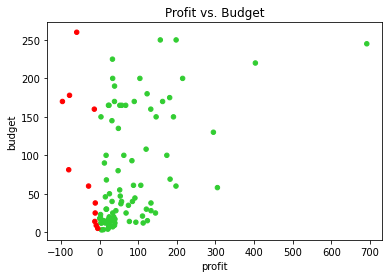

In [18]:
#Plot profit vs budget
# Plot a scatter or a joint plot between the columns budget and profit and write a few words on what you observed
movies.plot(kind = "scatter", x = "profit", y = "budget", c = "profit_colors", title = "Profit vs. Budget")
plt.show()

#### Observations

- We see couple of movies with large budgets having a negative value for Profit (ie., incurring a loss)
- There is one movie which has a high budget (approx. `250 Million`) and a very high profit (approx. `700 Million`)
- We cannot accurately judge the trend of movie profit based on budget looking at the scatter plot

Dropping the column `profit_colors` as it's no longer required

In [19]:
movies.drop(columns = "profit_colors", inplace = True)

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

Extract the movies with a negative profit and store them in a new dataframe - neg_profit

In [20]:
#Find the movies with negative profit
neg_profit = movies[movies.profit < 0]

In [21]:
# Verifying that only negative profit movies are present in the `neg_profit` dataframe
neg_profit.profit.value_counts()

-8.674623     1
-77.810499    1
-12.247786    1
-59.192738    1
-4.776162     1
-96.179906    1
-11.096291    1
-13.594629    1
-11.348338    1
-79.860848    1
-28.505730    1
Name: profit, dtype: int64

In [22]:
# To check if we have "Tangled" movie
neg_profit[neg_profit["Title"] == "Tangled"]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
96,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738


Can we spot the movie `Tangled` in the dataset? Although its one of the highest grossing movies of all time, it has negative profit as per this result. If we cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), we can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

We might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, we also have another column `IMDb_rating` which tells us the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, we find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly we will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, we need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [23]:
# Change the scale of MetaCritic
movies["MetaCritic"] = movies["MetaCritic"] / 10

In [24]:
# Checking distinct MetaCritic values to check if they are converted to a scale of 10
movies.MetaCritic.unique()

array([ 8.1,  6.9,  6.5,  7.6,  9.2,  7.8,  8.3,  7.2,  9.4,  9.6,  7.5,
        6.2,  8. ,  7.4,  8.8,  nan,  9.3,  7.9,  8.6,  7. ,  6.3,  6.8,
        7.3,  8.2,  9.5,  6.6,  8.9,  8.4,  7.7,  8.7, 10. ,  6.4,  7.1,
        6.7,  9. ])

In [25]:
# Find the average ratings
movies["Avg_rating"] = (movies["MetaCritic"] + movies["IMDb_rating"])/2

In [26]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)
UniversalAcclaim = movies[ (abs(movies["MetaCritic"] - movies["IMDb_rating"]) < 0.5) & (movies["Avg_rating"] >= 8) ].sort_values(by = "Avg_rating", ascending = False).copy()

In [27]:
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
80,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
36,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
68,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
40,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
21,The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.00
24,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00


- ### Subtask 2.4: Find the Most Popular Trios - I

If we are a producer looking to make a blockbuster movie, there will primarily be three lead roles in the movie and we wish to cast the most popular actors for it. Now, since we don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that we've chosen to check the popularity is the Facebook likes of each of these actors.

Our objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
We find out the top 5 popular trios, and output their names in a list.


In [28]:
# Grouping the actors based on their name and getting sum of their facebook likes. Once we sum up the values, we will
# get the total facebook likes of each trio of actors into a new dataframe "fb_actors_likes"
fb_actors_likes = pd.pivot_table(data = movies, index = ["actor_1_name","actor_2_name","actor_3_name"], values = ["actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes"], aggfunc = np.sum).sum(axis = 1)

In [29]:
# Getting the 5 most popular trio of actors
fb_actors_likes.sort_values(ascending = False).head(5)

actor_1_name       actor_2_name        actor_3_name        
Dev Patel          Nicole Kidman       Rooney Mara             138800.0
Leonardo DiCaprio  Tom Hardy           Joseph Gordon-Levitt     79000.0
Jennifer Lawrence  Peter Dinklage      Hugh Jackman             76000.0
Casey Affleck      Michelle Williams   Kyle Chandler            74818.0
Tom Hardy          Christian Bale      Joseph Gordon-Levitt     73000.0
dtype: float64

In [30]:
# Getting the 5 most popular trio of actors into a list
popular_trios_5 = fb_actors_likes.sort_values(ascending = False).head(5).index.to_list()
popular_trios_5

[('Dev Patel', 'Nicole Kidman', 'Rooney Mara'),
 ('Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'),
 ('Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'),
 ('Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'),
 ('Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt')]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask we found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that we aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

We can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

### **Write your answers below.**

- **`No. of trios that satisfy the above condition:`** 3

- **`Most popular trio after applying the condition:`** 'Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'

In [31]:
# Creating a new dataframe that holds the trio of actors along with their facebook likes
fb_actors_likes_ind = pd.pivot_table(data = movies, index = ["actor_1_name","actor_2_name","actor_3_name"], values = ["actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes"], aggfunc = np.sum)

In [32]:
# Iterating over each row and figure out the actors with facebook likes less than half of the other two
for lab,row in fb_actors_likes_ind.iterrows():
    if (row["actor_1_facebook_likes"]< row["actor_2_facebook_likes"]/2) | (row["actor_1_facebook_likes"]< row["actor_3_facebook_likes"]/2):
        fb_actors_likes_ind.loc[lab, "valid_like"] = "no"
    elif (row["actor_2_facebook_likes"]< row["actor_1_facebook_likes"]/2) | (row["actor_2_facebook_likes"]< row["actor_3_facebook_likes"]/2):
        fb_actors_likes_ind.loc[lab, "valid_like"] = "no"
    elif (row["actor_3_facebook_likes"]< row["actor_1_facebook_likes"]/2) | (row["actor_3_facebook_likes"]< row["actor_2_facebook_likes"]/2):
        fb_actors_likes_ind.loc[lab, "valid_like"] = "no"
    else:
        fb_actors_likes_ind.loc[lab, "valid_like"] = "yes"

In [33]:
# Creating "total_likes" column to add the likes of all three actors
fb_actors_likes_ind["total_likes"] = fb_actors_likes_ind["actor_1_facebook_likes"] + fb_actors_likes_ind["actor_2_facebook_likes"] + fb_actors_likes_ind["actor_3_facebook_likes"]

In [34]:
pop_trio_5pop = fb_actors_likes_ind.loc[fb_actors_likes_ind["valid_like"] != "no", :].sort_values(by = "total_likes", ascending = False).head(5).index.tolist()
pop_trio_5pop

[('Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'),
 ('Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'),
 ('Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'),
 ('Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'),
 ('Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans')]

- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be interesting to see how this variable this distributed. We plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

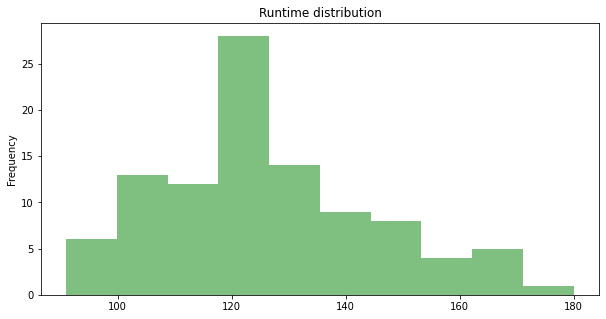

In [35]:
# Runtime histogram/density plot
movies.Runtime.plot(kind = "hist", title = "Runtime distribution", color = "green", alpha = 0.5, figsize = (10,5))
plt.show()

Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. We store these in a dataframe named `PopularR`.

In [36]:
# Write your code here
PopularR = movies[ movies["content_rating"] == "R" ].sort_values(by = "CVotesU18", ascending = False).head(10)

In [37]:
PopularR.reset_index(drop = True)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
0,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
1,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85
2,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
3,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55
4,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
5,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80
6,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.5,7.4,7.6,7.6,7.8,8.1,R,USA,47.968405,7.20
7,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00
8,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.8,7.8,7.9,7.7,8.1,8.0,R,USA,34.073773,8.45
9,Birdman or (The Unexpected Virtue of Ignorance),2014,18.0,42.335698,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.2,7.3,7.0,7.1,7.9,7.7,R,USA,24.335698,8.30


These kids are watching `Deadpool` a lot.

## Task 3 : Demographic analysis

If we take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, we need to aggregate a few values over these 3 columns. 
1. First,we create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [38]:
# Create the dataframe df_by_genre
# First create a new dataframe df_by_genre that contains genre_1, genre_2, and genre_3 and all the columns related to CVotes/Votes 
# from the movies data frame. There are 47 columns to be extracted in total
df_by_genre = movies.loc[:, "genre_1":"VotesnUS"]
df_by_genre.shape

(100, 49)

In [39]:
# Drop unnecessary columns "MetaCritic" and "Runtime"
df_by_genre.drop(columns = ["MetaCritic","Runtime"], inplace = True)

In [40]:
# Checking the shape to check if we have the required 47 columns
df_by_genre.shape

(100, 47)

In [41]:
# Create a column cnt and initialize it to 1
df_by_genre["cnt"] = 1

In [42]:
# Checking data of 'cnt' column
df_by_genre.cnt.value_counts()

1    100
Name: cnt, dtype: int64

In [43]:
# Group the movies by individual genres
# First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, 
# columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`
# Perform the same operation for genre_2 and genre_3 and store it dataframes df_by_g2 and df_by_g3 respectively

df_by_g1 = df_by_genre.groupby(by = "genre_1").agg(np.sum)
df_by_g2 = df_by_genre.groupby(by = "genre_2").agg(np.sum)
df_by_g3 = df_by_genre.groupby(by = "genre_3").agg(np.sum)

In [44]:
# All three genres have similar names and can be grouped together
print("genre_1", df_by_g1.index.unique)
print("genre_2", df_by_g2.index.unique)
print("genre_3", df_by_g3.index.unique)

genre_1 <bound method Index.unique of Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Mystery'],
      dtype='object', name='genre_1')>
genre_2 <bound method Index.unique of Index(['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre_2')>
genre_3 <bound method Index.unique of Index(['Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genre_3')>


In [45]:
# Add the grouped data frames and store it in a new data frame
# Now that you have 3 dataframes performed by grouping over genre_1, genre_2, and genre_3 separately, it's time to combine them.
# For this, add the three dataframes and store it in a new dataframe df_add, so that the corresponding values of Votes/CVotes get added for each genre.
# There is a function called add() in pandas which lets you do this. You can refer to this link to see how this function works. 
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html

df_add = df_by_g1.add(df_by_g2, fill_value = 0).add(df_by_g3, fill_value = 0)

In [46]:
df_add.shape

(20, 45)

In [47]:
# Extract genres with atleast 10 occurences
# The column cnt on aggregation has basically kept the track of the number of occurences of each genre.
# Subset the genres that have atleast 10 movies into a new dataframe genre_top10 based on the cnt column value
genre_top10 = df_add[df_add["cnt"] >= 10]

In [48]:
# Take the mean for every column by dividing with cnt 
# Now, take the mean of all the numeric columns by dividing them with column value cnt and store it back to the same dataframe.
# We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe movies
for each_col in genre_top10.columns[:-1]:
    genre_top10[each_col] /= genre_top10["cnt"].copy()

Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point

In [49]:
# Rounding off the columns of Votes to two decimals
genre_top10.loc[:,"VotesM":"VotesnUS"] = genre_top10.loc[:,"VotesM":"VotesnUS"].apply(lambda x: round(x,2))

In [50]:
# Convert all CVotes columns to int
list_cvotes = genre_top10.loc[:,"CVotes10":"CVotesnUS"].columns
genre_top10[list_cvotes] = genre_top10[list_cvotes].astype(int)

In [51]:
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


If we take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

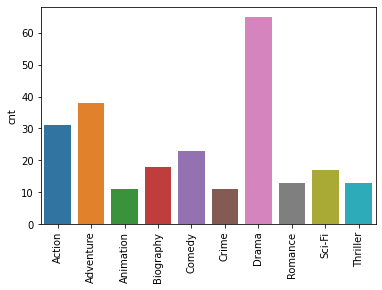

In [52]:
# Countplot for genres
sns.barplot(data = genre_top10, x = genre_top10.index, y = "cnt")
plt.xticks(rotation = 90)
plt.show()

`Drama` is the tallest bar indicating that they are most produced.

-  ###  Subtask 3.3: Gender and Genre

If we have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that we plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4.Repeat subtasks 1 to 3, but now instead of taking the CVotes-related columns, we need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

-  Note : Use `genre_top10` dataframe for this subtask

In [53]:
# 1st set of heat maps for CVotes-related columns

male_cvotes = pd.pivot_table(data=genre_top10, values = ["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"], index = genre_top10.index, 
               aggfunc = np.mean)
female_cvotes = pd.pivot_table(data=genre_top10, values = ["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"], index = genre_top10.index, 
               aggfunc = np.mean)

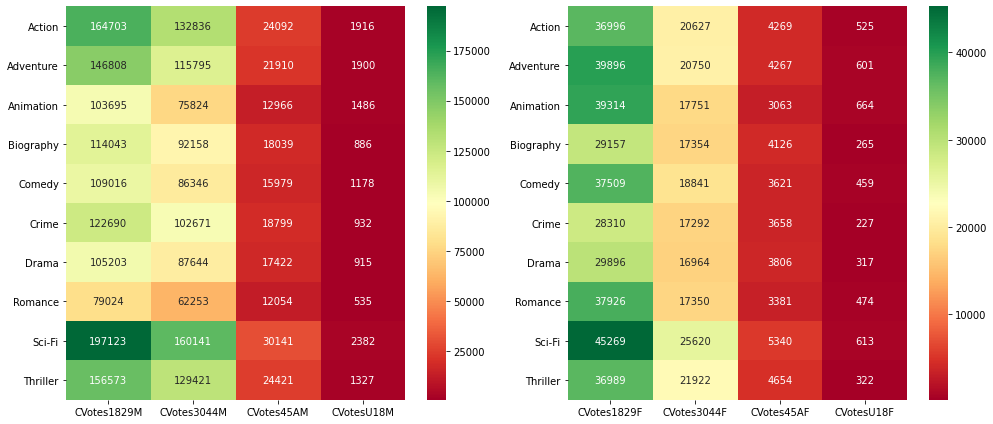

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [14,6])

sns.heatmap(male_cvotes, cmap = "RdYlGn", annot = True, ax = ax[0], fmt = "d")
sns.heatmap(female_cvotes, cmap = "RdYlGn", annot = True, ax = ax[1], fmt = "d")
plt.tight_layout()

plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. Additionally,
- Inference 1: We can see that all movie genres are least voted by Under 18 male and female group. This could be because there could be parental restrictions on the number aof movies that can be seen by these teenagers. There could also be restriction based on content rating which might affect their voting. We still have to verify this cause with other datasets
- Inference 2: `Animation` is the least voted genre by 45 & above female age group whereas it's `Romance` for 45 & above male age group
- Inference 3: `Sci-Fi` is the most voted genre by both male and female 30-44 age group

In [55]:
# 2nd set of heat maps for Votes-related columns

male_votes = pd.pivot_table(data=genre_top10, values = ["VotesU18M","Votes1829M","Votes3044M","Votes45AM"], index = genre_top10.index, 
               aggfunc = np.mean)
female_votes = pd.pivot_table(data=genre_top10, values = ["VotesU18F","Votes1829F","Votes3044F","Votes45AF"], index = genre_top10.index, 
               aggfunc = np.mean)

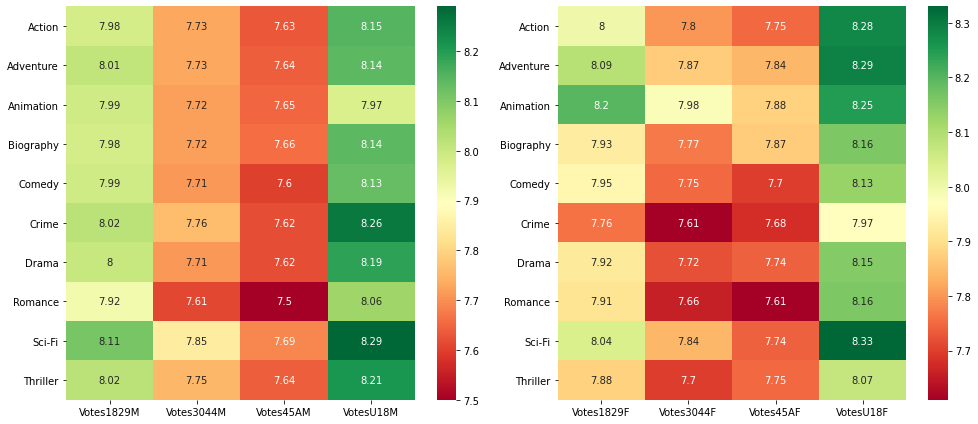

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [14,6])

sns.heatmap(male_votes, cmap = "RdYlGn", annot = True, ax = ax[0], fmt = "n")
sns.heatmap(female_votes, cmap = "RdYlGn", annot = True, ax = ax[1], fmt = "n")
plt.tight_layout()

plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. Additionally,
- Inference 1: *`Romance`* is the worst rated genre by both male and female with age 45 & above. In fact, as we can see from the pattern, the Avg rating decreases through age (U18, U1829, U3044, U45A) for both male and female age groups
- Inference 2: `Animation` movies are highest rated by 18-29 females while `Sci-Fi` are the highest rated by 18-29 males
- Inference 3: `Crime` movies are rated higher by U18 males compared to U18 females

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask.

In [57]:
# Creating IFUS column
movies["IFUS"] = movies.Country.apply(lambda x: "USA" if x == "USA" else "non-USA")

In [58]:
# Setting plot style
plt.style.use("ggplot")

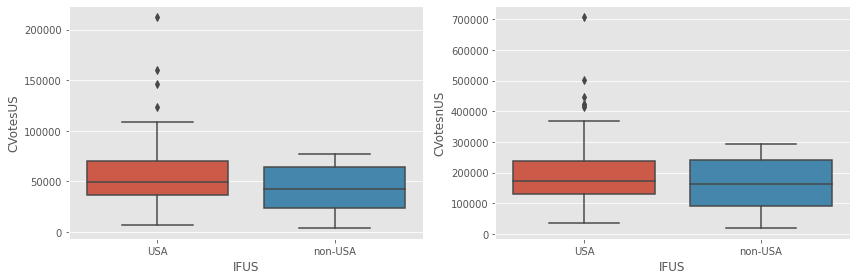

In [59]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
fix, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
sns.boxplot(data = movies, x = "IFUS", y = "CVotesUS", ax = ax[0])
sns.boxplot(data = movies, x = "IFUS", y = "CVotesnUS", ax = ax[1])

plt.tight_layout()
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: People from USA tend to vote more for USA movies than non-USA movies
- Inference 2: People from non-USA have more range of votes above 300K for USA movies and there are even some values that might be considered outliers. In contrast, there is no outlier for non-USA movies and upper ceiling of votes is capped around ~300K

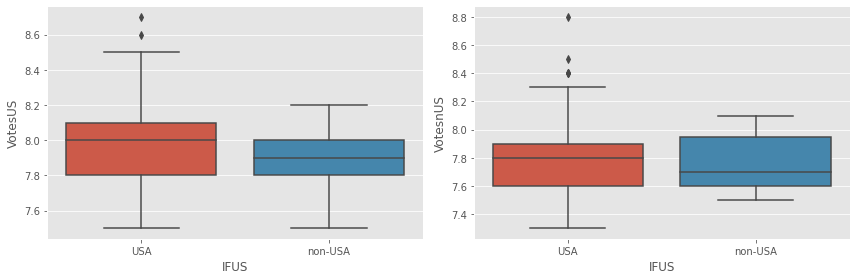

In [60]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
fix, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
sns.boxplot(data = movies, x = "IFUS", y = "VotesUS", ax = ax[0])
sns.boxplot(data = movies, x = "IFUS", y = "VotesnUS", ax = ax[1])

plt.tight_layout()
plt.show()

**`Inferences:`**
- Inference 1: USA voters have not rated any non-USA movie above 8.2 whereas we have values over that range for USA movies
- Inference 2: non-USA voters have not rated a non-USA movie below 7.4 whereas they have rated some USA movies below that value

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

We might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

In [61]:
# Sorting by CVotes1000
genre_top10.sort_values(by = "CVotes1000", ascending = False, inplace = True)

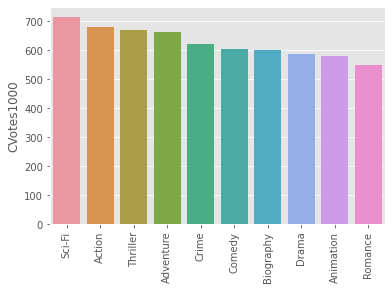

In [62]:
# Bar plot
sns.barplot(data = genre_top10, x = genre_top10.index, y = "CVotes1000")
plt.xticks(rotation = 90)
plt.show()

**`Inferences:
- Inference 1: Sci-Fi is the most popular genre voted by Top 1000 IMDb voters
- Inference 2: Action is the second most popular genre voted by Top 1000 IMDb voters
- Inference 3: The genre `Romance` seems to be most unpopular among the top 1000 voters